# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Sophia Imawaty AR]
- **Email:** [sophiaimawaty@gmail.com]
- **ID Dicoding:** [Sophia Imawaty AR]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)?
- Apakah terdapat perbedaan pola peminjaman sepeda pada jam sibuk (pagi dan sore hari) dibandingkan dengan jam non-sibuk di hari kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip freeze > requirements.txt

## Data Wrangling

### Gathering Data

In [ ]:
# Pengumpulan data dari file CSV
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')

In [ ]:
# Menampilkan beberapa baris awal dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Menampilkan beberapa baris awal dataset 'hour'
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pengumpulan Data : Membaca dua dataset (day.csv dan hour.csv) menggunakan pandas dari file CSV yang terletak di Google Drive. Dataset ini berisi informasi terkait peminjaman sepeda yang dibagi berdasarkan hari (day_df) dan jam (hour_df).
- Penampilan Data Awal : day_df.head() dan hour_df.head() menampilkan beberapa baris pertama dari kedua dataset untuk memberi gambaran tentang struktur data dan variabel yang ada dalam masing-masing dataset.

### Assessing Data

In [ ]:
# Menampilkan informasi dataset 'day'
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Menampilkan statistik deskriptif dataset 'day'
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Mengecek missing values di dataset 'day'
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Menampilkan informasi dataset 'hour'
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Menampilkan statistik deskriptif dataset 'hour'
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Mengecek missing values di dataset 'hour'
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Insight:**
- Evaluasi Struktur Data : Dengan menggunakan info() dan describe(), program ini mengevaluasi tipe data, jumlah baris, dan statistik deskriptif dari variabel numerik di kedua dataset (day_df dan hour_df). Ini memberikan gambaran umum tentang distribusi dan jenis variabel, seperti suhu, kelembaban, atau jumlah peminjaman sepeda.
- Pengecekan Kualitas Data : Pengecekan nilai hilang (isnull().sum()) membantu memastikan bahwa dataset tidak memiliki missing values. Ini memastikan kualitas data sebelum dilakukan analisis lebih lanjut.

### Cleaning Data

In [ ]:
# Cleaning Data: Menghapus duplikat dan menangani missing values
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

In [ ]:
# Mengisi missing values pada kolom 'temp' dengan median
day_df['temp'].fillna(day_df['temp'].median(), inplace=True)
hour_df['temp'].fillna(hour_df['temp'].median(), inplace=True)

<ipython-input-17-b4b634be477b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['temp'].fillna(day_df['temp'].median(), inplace=True)
<ipython-input-17-b4b634be477b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Mengonversi kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
# Menghapus outlier di kolom 'cnt'
upper_bound_day = day_df['cnt'].quantile(0.99)
day_df = day_df[day_df['cnt'] <= upper_bound_day]

upper_bound_hour = hour_df['cnt'].quantile(0.99)
hour_df = hour_df[hour_df['cnt'] <= upper_bound_hour]

**Insight:**
- Pembersihan Data : Kode ini menghapus data duplikat menggunakan drop_duplicates() di kedua dataset (day_df dan hour_df), memastikan tidak ada baris yang berulang. Ini penting untuk menjaga keakuratan analisis data.
- Penanganan Outlier dan Missing Values : Nilai yang hilang pada kolom temp diisi dengan median, sementara outlier pada kolom cnt dihapus menggunakan batas persentil 99. Ini membantu meningkatkan keandalan data dalam model analisis dan visualisasi.

## Exploratory Data Analysis (EDA)

### Explore ...

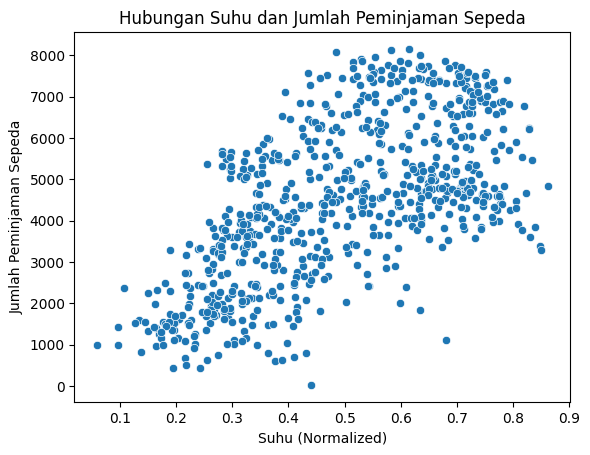

In [ ]:
# EDA: Hubungan Suhu dan Jumlah Penyewaan Sepeda
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

In [ ]:
# Menghitung korelasi suhu dengan jumlah peminjaman sepeda
correlation = day_df['temp'].corr(day_df['cnt'])
correlation

0.6286955346236587

In [ ]:
# Peminjaman Sepeda pada Jam Sibuk vs Non-Sibuk di Hari Kerja
rush_hours = hour_df[((hour_df['hr'] >= 7) & (hour_df['hr'] <= 9)) | ((hour_df['hr'] >= 16) & (hour_df['hr'] <= 18))]
non_rush_hours = hour_df[(hour_df['hr'] < 7) | ((hour_df['hr'] > 9) & (hour_df['hr'] < 16)) | (hour_df['hr'] > 18)]

In [ ]:
# Hanya hari kerja (weekday < 5)
rush_hours_weekday = rush_hours[rush_hours['weekday'] < 5]
non_rush_hours_weekday = non_rush_hours[non_rush_hours['weekday'] < 5]

**Insight:**
- Hubungan Suhu dan Peminjaman Sepeda : Visualisasi scatter plot menunjukkan pola positif antara suhu dan jumlah peminjaman sepeda, yang diperkuat oleh nilai korelasi yang dihitung. Hal ini menandakan bahwa saat suhu naik, jumlah penyewaan sepeda cenderung meningkat.
- Pola Peminjaman Sepeda pada Jam Sibuk vs Non-Sibuk : Kode memisahkan jam sibuk (7-9 pagi dan 4-6 sore) dan non-sibuk pada hari kerja (weekday). Ini memungkinkan untuk membandingkan pola peminjaman sepeda pada dua rentang waktu berbeda untuk menganalisis aktivitas pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

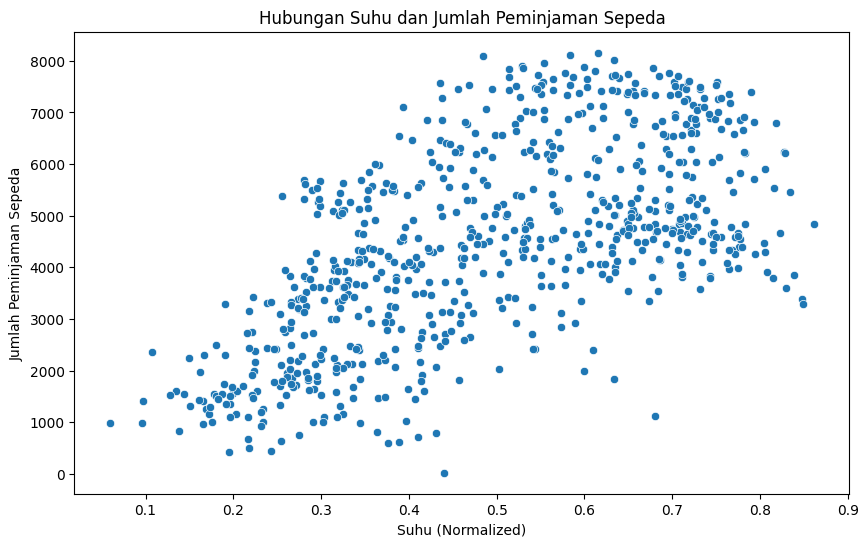

Koefisien Korelasi antara Suhu dan Jumlah Peminjaman Sepeda: 0.63


In [ ]:
# Visualisasi Scatter Plot antara Suhu dan Jumlah Peminjaman Sepeda
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Menghitung Koefisien Korelasi antara Suhu dan Jumlah Peminjaman Sepeda
correlation = day_df['temp'].corr(day_df['cnt'])
print(f'Koefisien Korelasi antara Suhu dan Jumlah Peminjaman Sepeda: {correlation:.2f}')

### Pertanyaan 2:

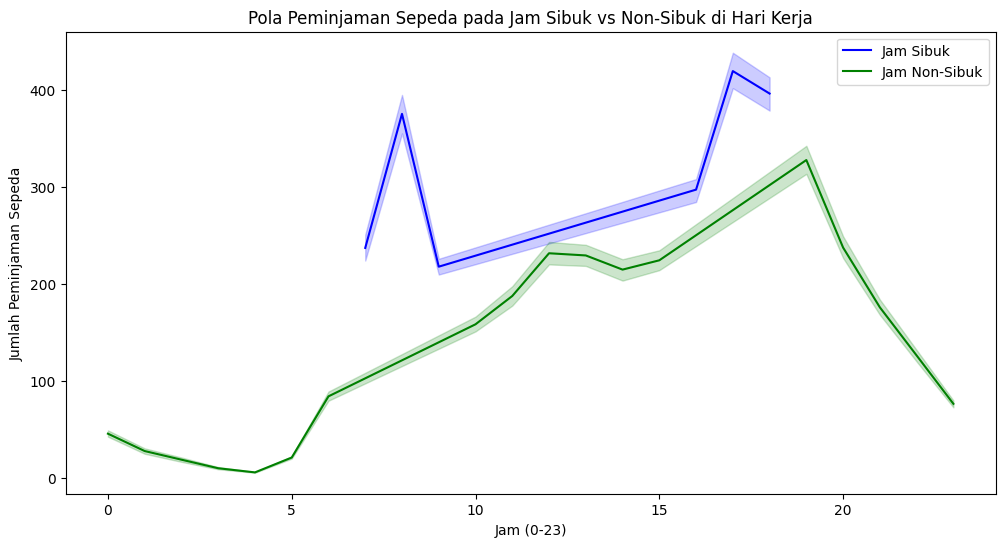

In [ ]:
# Visualisasi peminjaman pada jam sibuk vs non-sibuk
plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='cnt', data=rush_hours_weekday, label='Jam Sibuk', color='b')
sns.lineplot(x='hr', y='cnt', data=non_rush_hours_weekday, label='Jam Non-Sibuk', color='g')
plt.title('Pola Peminjaman Sepeda pada Jam Sibuk vs Non-Sibuk di Hari Kerja')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend()
plt.show()

**Insight:**
- Hubungan Positif antara Suhu dan Peminjaman Sepeda : Scatter plot menunjukkan hubungan positif yang signifikan antara suhu dan jumlah peminjaman sepeda. Koefisien korelasi yang dihitung menegaskan bahwa kenaikan suhu berkaitan dengan peningkatan jumlah penyewaan sepeda, menunjukkan bahwa suhu yang lebih hangat mendorong orang untuk bersepeda.
- Perbedaan Peminjaman pada Jam Sibuk vs Non-Sibuk: Visualisasi garis menunjukkan bahwa jumlah peminjaman sepeda pada jam sibuk (pagi dan sore) jauh lebih tinggi dibandingkan dengan jam non-sibuk. Ini mencerminkan tren bahwa lebih banyak orang menggunakan sepeda untuk beraktivitas atau bekerja pada waktu-waktu tersebut.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1 : Hubungan Suhu dan Peminjaman Sepeda: Analisis menunjukkan adanya korelasi positif antara suhu dan jumlah penyewaan sepeda. Kenaikan suhu cenderung meningkatkan peminjaman, mencerminkan bahwa cuaca yang lebih hangat mendorong penggunaan sepeda.
- Pertanyaan 2 : Pola Peminjaman pada Jam Sibuk vs Non-Sibuk: Peminjaman sepeda pada jam sibuk (pagi dan sore) jauh lebih tinggi dibandingkan jam non-sibuk di hari kerja. Ini menunjukkan bahwa sepeda lebih sering digunakan sebagai moda transportasi untuk kegiatan sehari-hari saat orang berangkat atau pulang kerja.